In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_csv('Breast_cancer_dataset.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming your DataFrame is named 'df'
X = df.drop('diagnosis', axis=1)  # Features: all columns except diagnosis
y = df['diagnosis']               # Target: diagnosis column (M/B)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier with your specified parameters
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)  # You need to fit THIS model

# Make predictions
y_pred = clf_model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106   2]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [18]:
X = df.drop(['diagnosis', 'id'], axis=1)  # Drop both target and ID column

In [19]:
# Train the simple default model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Train the tuned model
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

# Compare both
y_pred_default = clf.predict(X_test)
y_pred_tuned = clf_model.predict(X_test)

print("Default Model:")
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

print("\nTuned Model:")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Default Model:
[[101   7]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Tuned Model:
[[106   2]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Accuracy Score: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



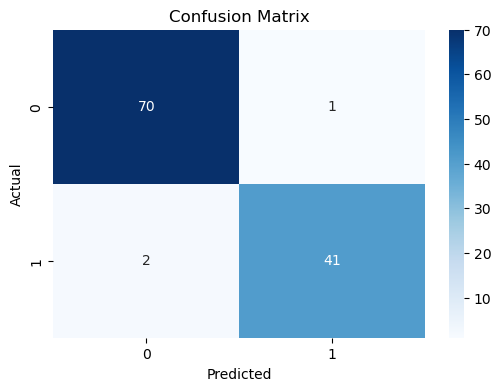

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('Breast_cancer_dataset.csv')

# 2. Preprocessing
# Drop 'id' as it's not a predictive feature
# The dataset often has an empty column at the end, we drop columns with all NaNs
df = df.dropna(axis=1, how='all')
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Encode diagnosis: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 3. Define Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling (Crucial for Logistic Regression convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Initialize and Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy Score: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



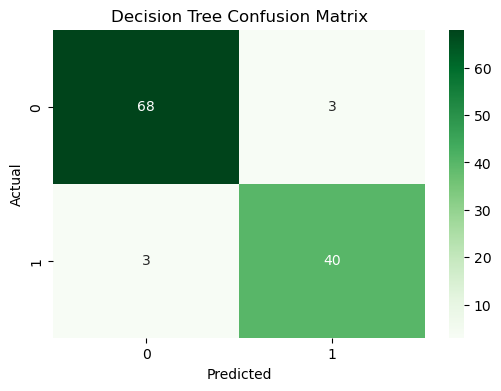

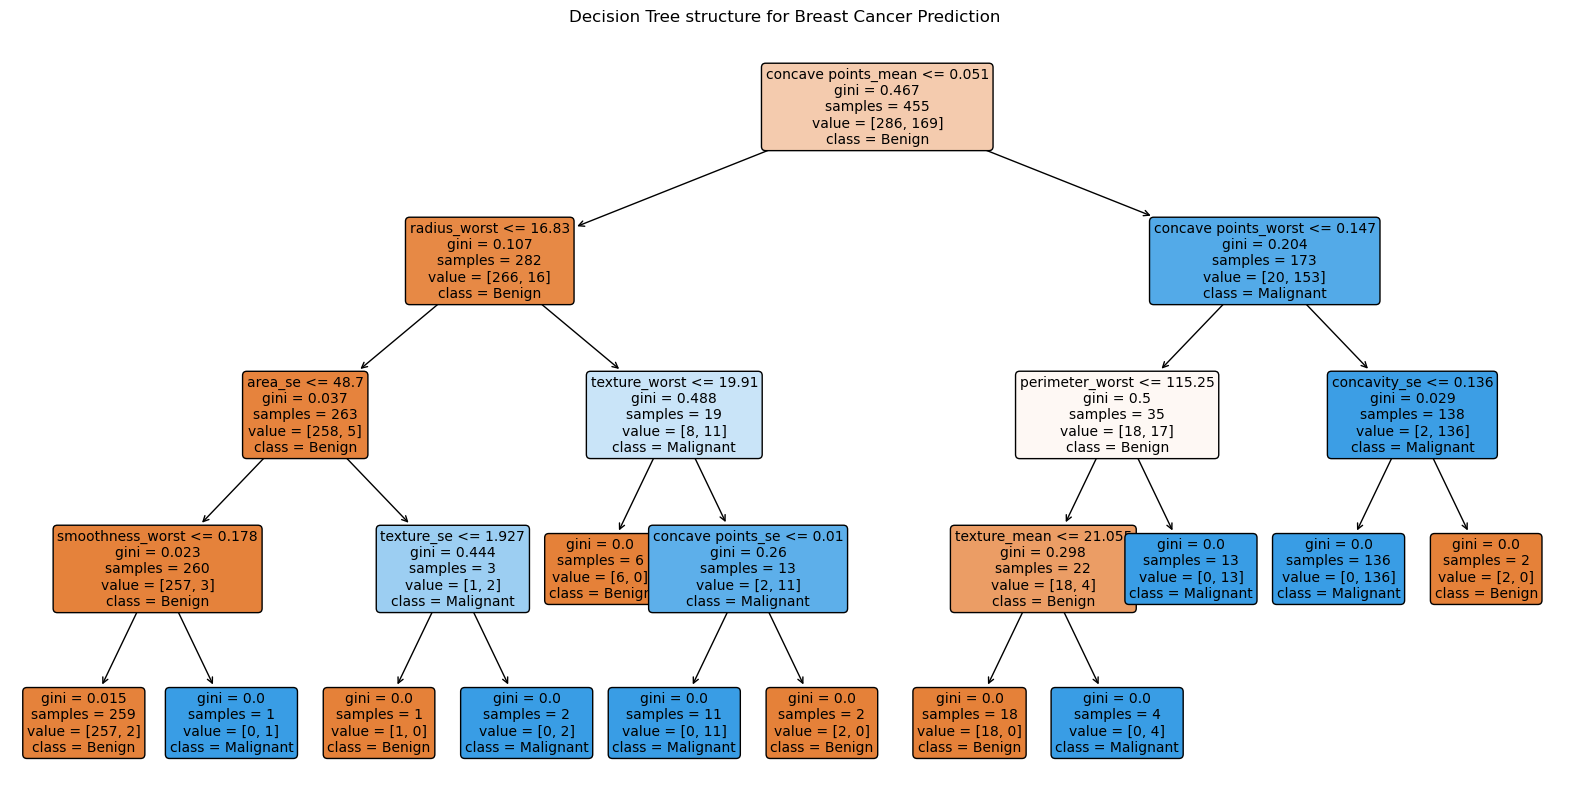

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load the dataset
df = pd.read_csv('Breast_cancer_dataset.csv')

# 2. Data Cleaning
# Drop 'id' and the empty 'Unnamed: 32' column
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# 3. Target Encoding
# Encode diagnosis: M (Malignant) = 1, B (Benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 4. Define Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 5. Split the data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialize and Train the Decision Tree
# We set max_depth=4 to keep the tree readable for visualization
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)

# 8. Evaluation Results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Visualization - Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('decision_tree_cm.png')

# 10. Visualization - The Tree itself
plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['Benign', 'Malignant'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree structure for Breast Cancer Prediction')
plt.savefig('decision_tree_viz.png')